# FULL names:Jacky Wong
# Student ID numbers:47179864

Acknowledgement Statement by students: <br>
Please keep one acknowledgment from the following<br>
	I acknowledge that I have not used GenAI (e. g., ChatGPT) in drafting and proofreading of this assignment.<br>
	I acknowledge that I have only used GenAI (e.g., ChatGPT) in drafting and proofreading this assignment, which is permitted in the assignment instructions. <br>



# Answer to Section 1: Clean the dataset  (in this section, insert as many cells as needed) 

In [4]:
import pandas as pd
from scipy import stats
from scipy.stats import skew
df1 = pd.read_csv("Dataset2.csv", encoding = 'ISO-8859-1', low_memory=False)
df2 = pd.read_csv("Dataset1.csv", encoding = 'ISO-8859-1', low_memory=False)
data = pd.concat([df1, df2], ignore_index=True)
data.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,customer_order_number,dss_update_time
0,20210125.0,NaN,471150112,400.0,10311,COM,COM90001,COM90,5.0,Trade,...,-6.69,-3.810,-3.0,0.0,AUD,NaN,NaN,0.0,277995,49:58.7
1,20220513.0,NaN,277000801,200.0,10311,COM,COM90001,COM90,5.0,Trade,...,7.44,3.810,3.0,0.0,AUD,NaN,749295.0,0.0,867468,49:58.7
2,20230611.0,NaN,292314701,200.0,10350,OTH,999,14001,5.0,Trade,...,160.20,68.910,6.0,0.0,AUD,NaN,756507.0,0.0,880839,49:58.7
3,20240111.0,NaN,299480703,200.0,10350,OTH,999,14001,5.0,Trade,...,74.70,34.455,3.0,0.0,AUD,NaN,724149.0,0.0,821554,49:58.7
4,20210321.0,NaN,471150015,400.0,10364,COM,COM03002,COM03,5.0,Trade,...,135.00,84.420,18.0,0.0,AUD,NaN,738377.0,0.0,847171,49:58.7


In [5]:
data.shape

(1988382, 34)

In [6]:
missing_data = data.isnull().sum()
print(missing_data)

accounting_date                   8
company_code                     19
customer_code                    11
customer_district_code            9
item_code                         6
business_area_code                6
item_group_code                   7
item_class_code                  15
item_type                        86
bonus_group_code                 16
environment_group_code           28
technology_group_code            17
commission_group_code            21
reporting_classification         19
light_source                     12
warehouse_code                   15
abc_class_code                   17
abc_class_volume                  5
business_chain_l1_code            7
business_chain_l1_name           11
contact_method_code               9
salesperson_code                 19
order_type_code                  17
market_segment                    5
value_sales                       2
value_cost                        0
value_quantity                    2
value_price_adjustment      

In [7]:
#Check code to see a correlation with other variables
data['item_code'].unique()
item_code_array = data['item_code'].values
data['business_chain_l1_name'].unique()
business_code_array = data['business_chain_l1_name'].values
data['business_chain_l1_code'].unique()
business_code_array_2 = data['business_chain_l1_code'].values
data['abc_class_volume'].unique()
abc_array = data['abc_class_volume'].values
data['abc_class_code'].unique()
abc_array_2 = data['abc_class_code'].values
data['item_group_code'].unique()
warehouse_array= data['item_group_code'].values

In [8]:
#Develop a search and fill function which uses common variables to fill missing values
df = data['item_code'].isin(item_code_array)
item_fix = data.loc[df, ["item_type", "item_class_code", "item_group_code"]].dropna().iloc[0]
df2 = data['business_chain_l1_name'].isin(business_code_array)
business_fix = data.loc[df2, ["business_area_code","environment_group_code","technology_group_code","commission_group_code","business_chain_l1_name","customer_district_code","company_code","customer_code"]].dropna().iloc[0]
df3 = data['abc_class_volume'].isin(abc_array)
abc_fix = data.loc[df3, "abc_class_code"].dropna().iloc[0]
df4 = data['abc_class_code'].isin(abc_array_2)
abc_fix_2 = data.loc[df4, "abc_class_volume"].dropna().iloc[0]
df5 = data['business_chain_l1_code'].isin(business_code_array_2)
business_fix_2 = data.loc[df5,'business_chain_l1_code'].dropna().iloc[0]
df6 = data['item_group_code'].isin(warehouse_array)
warehouse_fix = data.loc[df6, 'warehouse_code'].dropna().iloc[0]

In [9]:
#Apply search an fill
data.loc[df, ["item_type", "item_class_code", "item_group_code"]] = data.loc[df, ["item_type", "item_class_code", "item_group_code"]].fillna(item_fix)
data.loc[df2, ["business_area_code","environment_group_code","technology_group_code","commission_group_code","business_chain_l1_name","customer_district_code","company_code","customer_code"]] =data.loc[df2, ["business_area_code","environment_group_code","technology_group_code","commission_group_code","business_chain_l1_name","customer_district_code","company_code","customer_code"]].fillna(business_fix)
data.loc[df3, "abc_class_code"] = data.loc[df3, "abc_class_code"].fillna(abc_fix)
data['market_segment'] = data['market_segment'].fillna("Commercial & Industrial")
data.loc[df4, "abc_class_volume"] = data.loc[df4, "abc_class_volume"].fillna(abc_fix_2)
data.loc[df5,'business_chain_l1_code'] = data.loc[df5,'business_chain_l1_code'].fillna(business_fix_2)
data['light_source'] = data['light_source'].fillna("Traditional")
data.loc[df6, 'warehouse_code'] = data.loc[df6, 'warehouse_code'].fillna(warehouse_fix)

In [10]:
#This value is all null
data.drop('item_source_class', axis=1, inplace=True)

In [11]:
data.isnull().sum()

accounting_date              8
company_code                 0
customer_code                0
customer_district_code       0
item_code                    6
business_area_code           0
item_group_code              0
item_class_code              0
item_type                    0
bonus_group_code            16
environment_group_code       0
technology_group_code        0
commission_group_code        0
reporting_classification    19
light_source                 0
warehouse_code               0
abc_class_code               0
abc_class_volume             0
business_chain_l1_code       0
business_chain_l1_name       0
contact_method_code          9
salesperson_code            19
order_type_code             17
market_segment               0
value_sales                  2
value_cost                   0
value_quantity               2
value_price_adjustment       1
currency                     0
invoice_number               1
line_number                  2
customer_order_number        1
dss_upda

In [12]:
#Remaing value are unique and can't be filled, so they are removed
data_clean = data.dropna()
data_clean.isnull().sum()

accounting_date             0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity              0
value_price_adjustment      0
currency                    0
invoice_number              0
line_number                 0
customer_order_number       0
dss_update_time             0
dtype: int

In [13]:
#No 100 = Remove
data['customer_district_code'].unique()
#No PME = PMO
data['order_type_code'].unique()
#No 1N3 = 1N1, 1N2 = 1N0, BB1 = Remove, 1T1 = 1T0
# 1N3 and 1N2 could be 1N1 or 1N0 
data['warehouse_code'].unique()
#No d = D
data['environment_group_code'].unique()
#No 128 = SYLV, 112 = Remove, 114 = Remove, DIGIN = Remove, PHANT = Remove
data['technology_group_code'].unique()

# Missentered data are matched through the metadata, whether or not they should be there.
#Note: Data that is marked for Remove displays a high level of discrepancy that makes it impossible to know what it is meant to be
# Data that is labeled to be renamed has provided enough data in their rows to know what the intended data was supposed to be.

array(['76', 'CROM                                    ',
       'NA                                      ', '220', '86', '219',
       'PIER                                    ', '78', '206',
       'SYLV                                    ', '68', '85', '198',
       '90', 'PNZ                                     ', '130', '96',
       '500', 'INZ                                     ', '61', '215',
       '360', '380', 'GLG                                     ', '100',
       'CSE                                     ', '545', '225', '420',
       '217', '210', '320', '540', '460', '570', '565', '480', '580',
       '214', '830', '555', '330', '290', '280', '999', '760', '310',
       '400', '110', '560', '213', '160', '800', '440', '92', '600',
       '850', '70', 'SCHR                                    ', '102',
       '82', '300', '740', '181', '350', '520', '98', '415', '720', '340',
       '780', '108', '550', '240',
       'FGDFT                                   ', '123', '595'

In [14]:
#RT17 does not exist, too many unknown variable mean it is removed instead of fixed
customer_filter = data[data['customer_district_code'] == 100]
print(customer_filter)

        accounting_date  company_code customer_code  customer_district_code  \
710104       20230916.0         205.0    RT17                         100.0   
710105       20240917.0         205.0    RT17                         100.0   
710843       20210917.0         205.0    RT17                         100.0   
710846       20200916.0         205.0    RT17                         100.0   
915059       20240916.0         205.0    RT17                         100.0   
915060       20240917.0         205.0    RT17                         100.0   

                             item_code              business_area_code  \
710104  TRDLGPT                         COM                              
710105  TRDLGPT                         COM                              
710843  TRDSMPT                         COM                              
710846  TRDSMPT                         COM                              
915059  TRDMDPT                         COM                              
91

In [15]:
order_filter = data[data['order_type_code'] == "PME"]
print(order_filter)
# PMO has the closes spelling and is what was originally intended, removing 200 rows is too much

        accounting_date  company_code customer_code  customer_district_code  \
599499       20211106.0         101.0     252000110                   200.0   
599518       20200717.0         101.0     299500530                   200.0   
599523       20240910.0         101.0     311000703                   300.0   
599524       20200918.0         101.0     610910719                   600.0   
599531       20200703.0         101.0     254000201                   200.0   
...                 ...           ...           ...                     ...   
940678       20231016.0         101.0     531900101                   720.0   
948336       20230828.0         101.0     452000925                   400.0   
948344       20240823.0         101.0     252000115                   210.0   
948357       20221129.0         101.0     610910705                   600.0   
948396       20211219.0         101.0     361001440                   300.0   

                             item_code             

In [16]:
warehouse_filter = data[data['warehouse_code'] == "BB1"]
print(warehouse_filter)
#test each variable and find a unique variable that can be used to source what the data should be
#BB1 is removed as their is too many variation to determine what was intended

        accounting_date  company_code customer_code  customer_district_code  \
161485       20210408.0         120.0     501470100                   500.0   
161486       20210403.0         120.0     501470100                   500.0   
161487       20230404.0         120.0     501470100                   500.0   
161488       20220404.0         120.0     501470100                   500.0   
317547       20230409.0         120.0     501470100                   500.0   
...                 ...           ...           ...                     ...   
932023       20211024.0         120.0     124760100                   720.0   
932024       20200705.0         120.0     231900101                   720.0   
932046       20221217.0         120.0     124760100                   720.0   
939417       20240814.0         120.0     115900100                   720.0   
939485       20201127.0         120.0     124780100                   710.0   

                             item_code             

In [17]:
tech_filter = data[data['technology_group_code'] == "PHANT                                   "]
print(tech_filter)
#Too many variations in data makes it difficult to know what the correct data is, so it is removed.

        accounting_date  company_code customer_code  customer_district_code  \
243154       20220430.0         101.0     352000505                   300.0   
429799       20240221.0         101.0     222960100                   200.0   
429800       20220313.0         101.0     222960100                   200.0   

                             item_code              business_area_code  \
243154  Y80020                          COM                              
429799  Y800632                         COM                              
429800  Y800632                         COM                              

                       item_group_code                 item_class_code  \
243154  COM99001                        COM99                            
429799  COM01001                        COM01                            
429800  COM01001                        COM01                            

        item_type bonus_group_code  ...           market_segment value_sales  \
243154   

In [18]:
#Apply entry corrections and removals
order_removal = ['EDS', 'OBS', 'PPD', 'PM0', 'PGS', 'SPL', 'ZOP', 'ZC2', '5TN', 'PPO', 'ZD3', 'CSO']
data = data_clean[data_clean['customer_district_code'] != 100]
type_correction = {'PME':'PMO'}
data_clean['order_type_code'] = data_clean['order_type_code'].replace(type_correction)
warehouse_correction = {'1N3':'1N1', '1N2':'1N0', '1T1':'1T0'}
data_clean['warehouse_code'] = data_clean['warehouse_code'].replace(warehouse_correction)
data_clean = data_clean[data_clean['warehouse_code'] != "BB1"]
enviro_correction = {'d':'D'}
data_clean['environment_group_code'] = data_clean['environment_group_code'].replace(enviro_correction)
tech_correction = {'128':'SYLV                                    '}
data_clean['technology_group_code'] = data['technology_group_code'].replace(tech_correction)
data_clean['currency'] = data['currency'].replace({'AUS' : 'AUD'})
data_clean = data_clean[data_clean['technology_group_code'] != 114]
data_clean = data_clean[data_clean['technology_group_code'] != 'DIGIN                                   ']
data_clean = data_clean[data_clean['technology_group_code'] != 'PHANT                                   ']
data_clean = data_clean[data_clean['currency'] != '   ']
data_clean = data_clean[~data_clean['order_type_code'].isin(order_removal)]
data_clean['order_type_code'].unique()

array(['NOR', 'CRD', 'PRO', 'CSH', 'CRR', 'PRD', 'EXP', 'PUP', 'CDG',
       'EDI', 'ZCR', 'NOS', 'NOH', 'AES', 'CPR', 'ZCG', 'SPC', 'PMO',
       'CRP', 'COP', 'MIN', 'PSA', 'COA', 'WDC'], dtype=object)

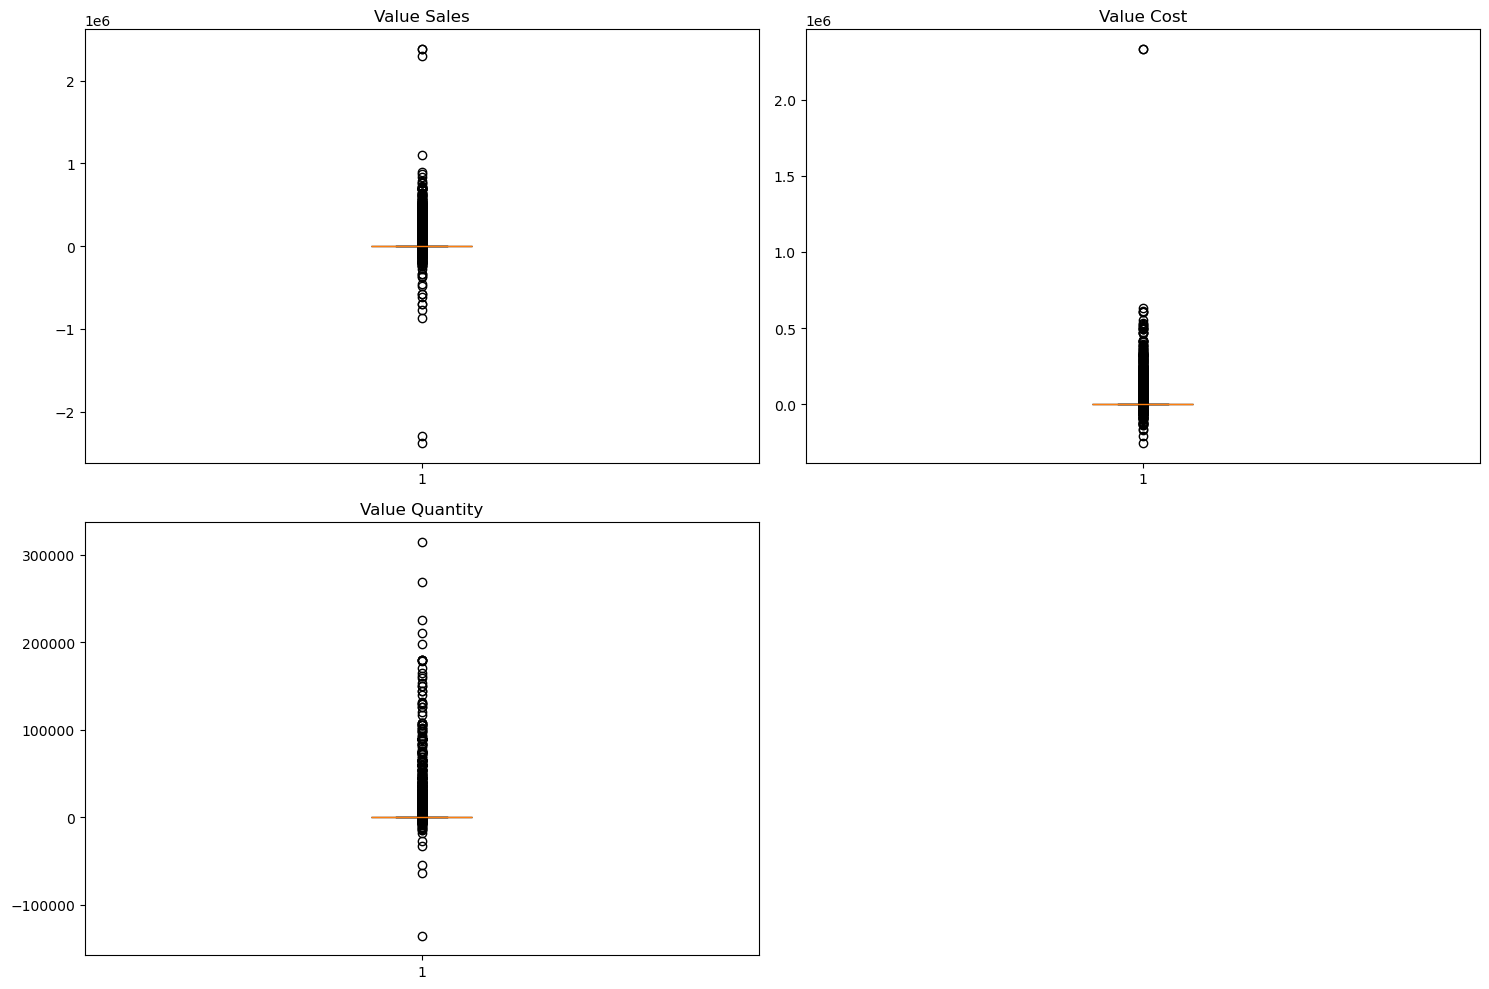

In [19]:
#Observe for outlers
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 10))

# Boxplot for value_sales
plt.subplot(2, 2, 1)
plt.boxplot(data['value_sales'], patch_artist=True)
plt.title('Value Sales')

# Boxplot for value_cost
plt.subplot(2, 2, 2)
plt.boxplot(data['value_cost'], patch_artist=True)
plt.title('Value Cost')

# Boxplot for value_quantity
plt.subplot(2, 2, 3)
plt.boxplot(data['value_quantity'], patch_artist=True)
plt.title('Value Quantity')

# Layout adjustment
plt.tight_layout()
plt.show()

#Too many outliers to fix

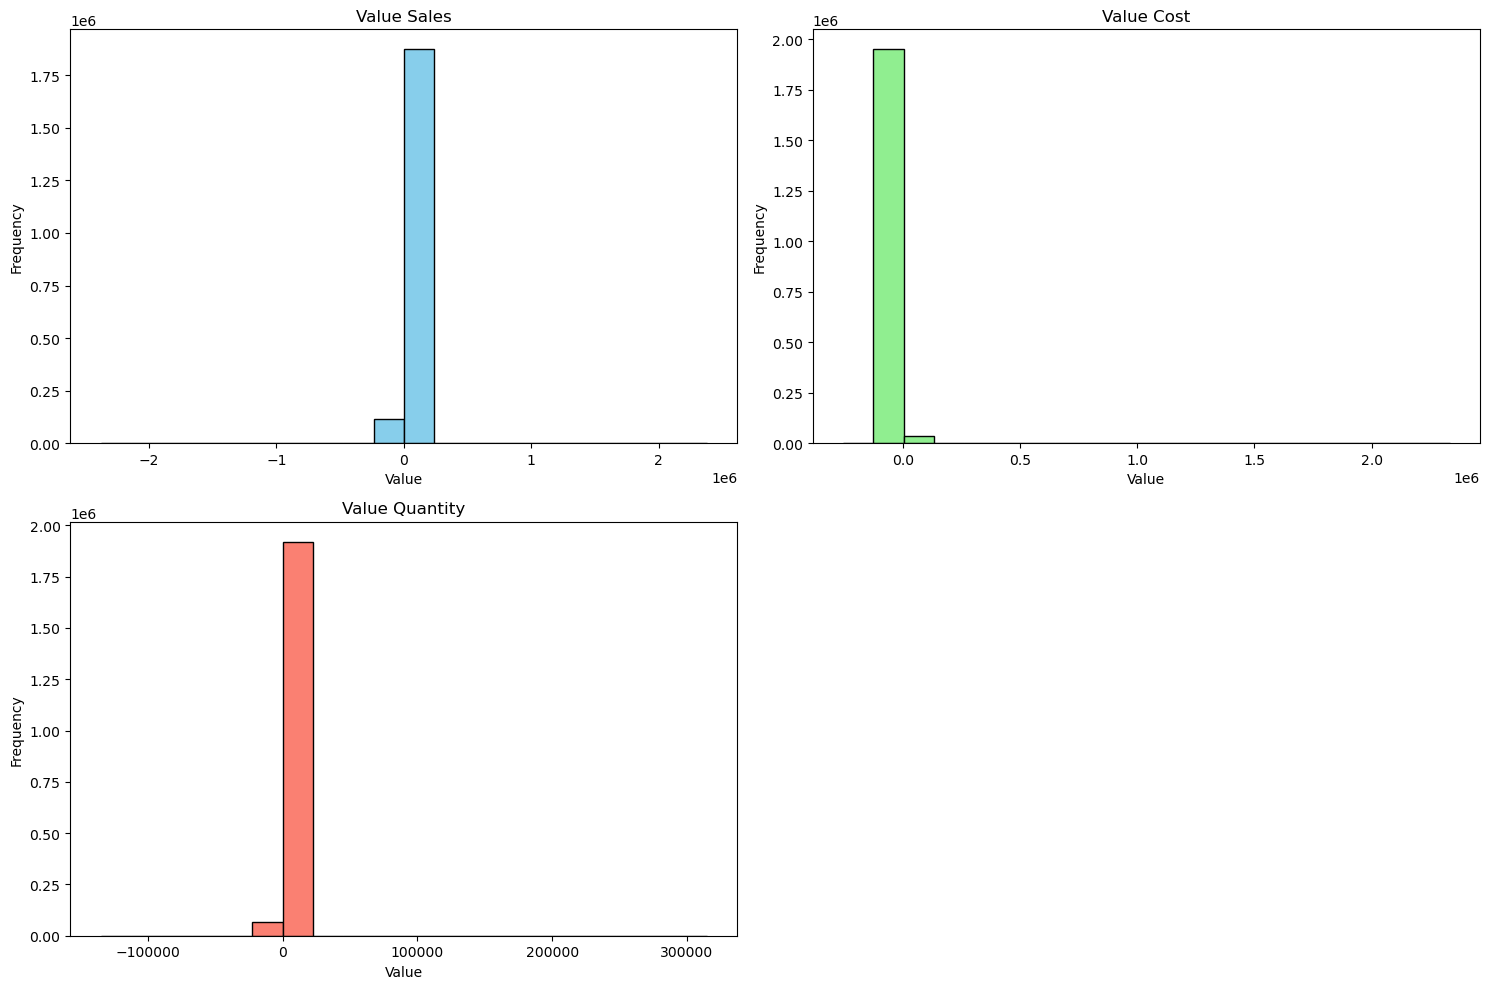

In [20]:
# Observe distribution of numerical variables
plt.figure(figsize=(15, 10))

# Histogram for value_sales
plt.subplot(2, 2, 1)
plt.hist(data['value_sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Value Sales')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for value_cost
plt.subplot(2, 2, 2)
plt.hist(data['value_cost'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Value Cost')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for value_quantity
plt.subplot(2, 2, 3)
plt.hist(data['value_quantity'], bins=20, color='salmon', edgecolor='black')
plt.title('Value Quantity')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Layout adjustment
plt.tight_layout()
plt.show()

#They all possess high skews that can't be fixed

In [21]:
skew1 = data['value_cost'].skew()
skew2 = data['value_quantity'].skew()
skew3 = data['value_sales'].skew()
print(skew1, skew2, skew3)

141.4117217998801 114.69042192394312 29.89247841725576


# Answer Section 2: Exploratory Insights (all the codes in one cell - do not insert extra cells) 

## section 2.1 (all the codes in one cell - do not insert extra cells) 

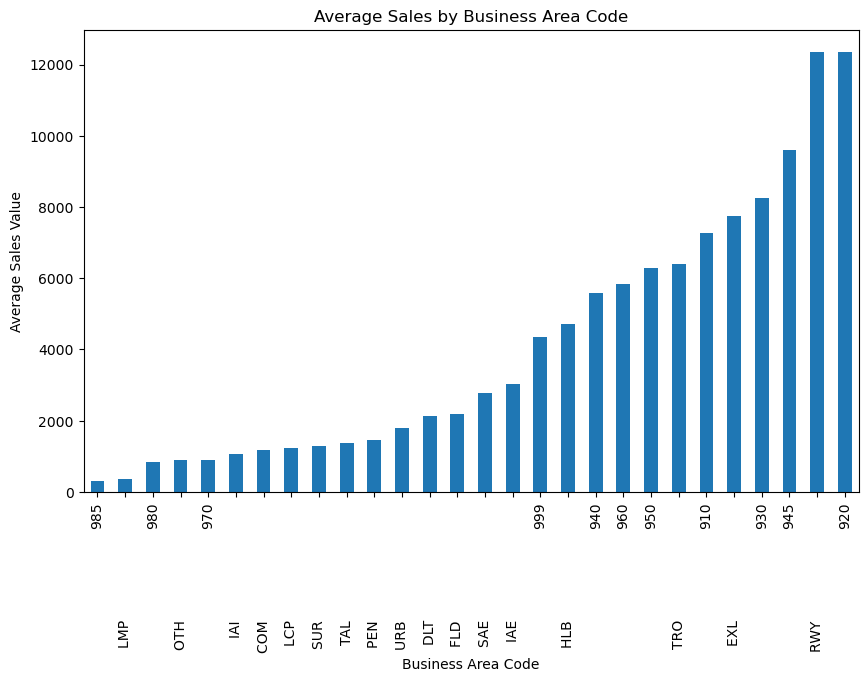

In [24]:
business_area_sales = data_clean.groupby('business_area_code')['value_sales'].mean().sort_values()
plt.figure(figsize=(10, 6))
business_area_sales.plot(kind='bar')
plt.title('Average Sales by Business Area Code')
plt.ylabel('Average Sales Value')
plt.xlabel('Business Area Code')
plt.show()

## section 2.2 (all the codes in one cell - do not insert extra cells) 

C:\Users\doomz\AppData\Local\Temp\ipykernel_23700\2813794628.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_clean.resample('M', on='accounting_date')['value_sales'].sum()


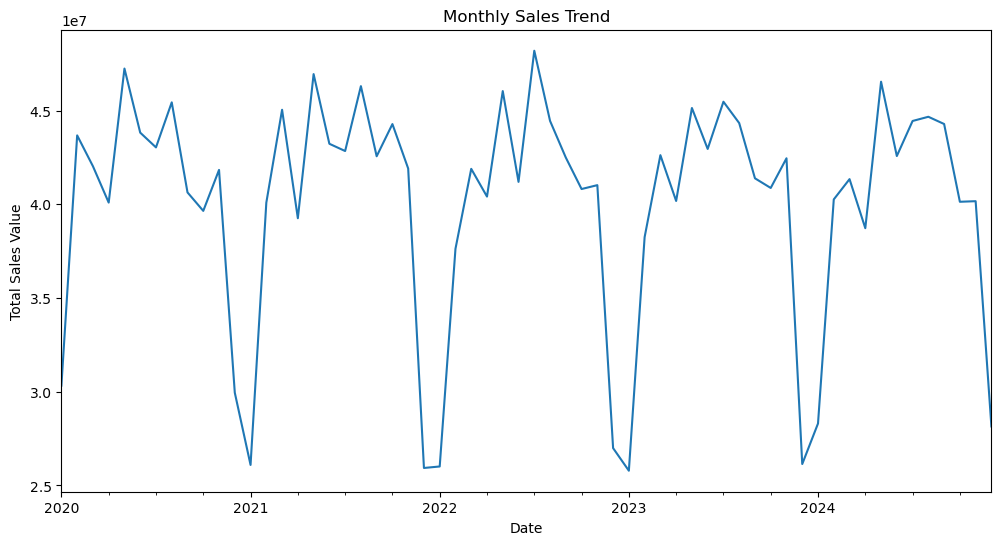

C:\Users\doomz\AppData\Local\Temp\ipykernel_23700\2813794628.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_2024 = data_2024.resample('M', on='accounting_date')['value_sales'].sum()


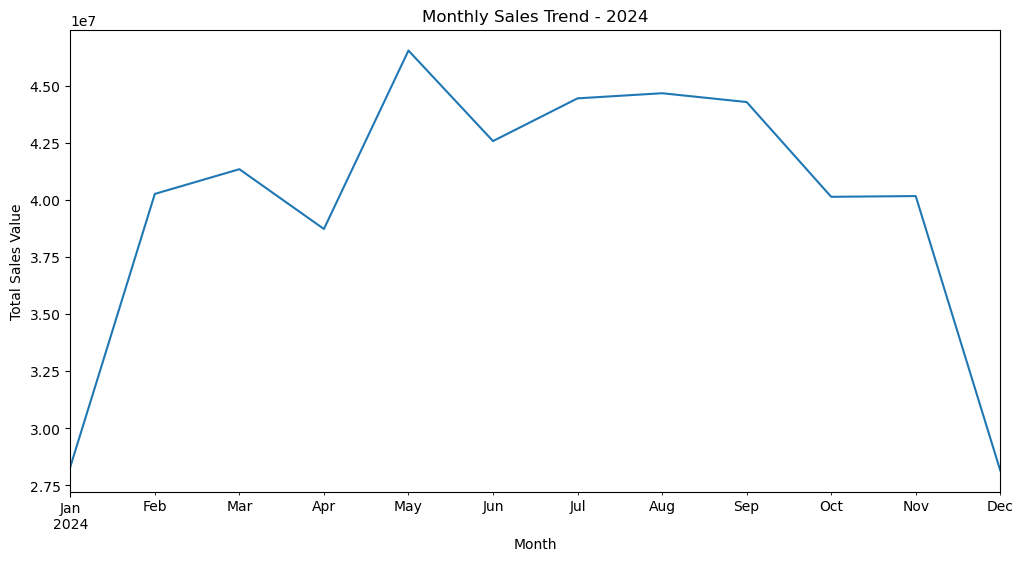

In [26]:
data_clean['accounting_date'] = pd.to_datetime(data_clean['accounting_date'], format='%Y%m%d', errors='coerce')
data_clean = data_clean.dropna(subset=['accounting_date'])

monthly_sales = data_clean.resample('M', on='accounting_date')['value_sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales Value')
plt.xlabel('Date')
plt.show()

data_clean['accounting_date'] = pd.to_datetime(data_clean['accounting_date'], format='%Y%m%d', errors='coerce')
data_clean = data_clean.dropna(subset=['accounting_date'])

# Filter for 2024 data
data_2024 = data_clean[data_clean['accounting_date'].dt.year == 2024]

# Resample monthly and sum value_sales
monthly_sales_2024 = data_2024.resample('M', on='accounting_date')['value_sales'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_sales_2024.plot()
plt.title('Monthly Sales Trend - 2024')
plt.ylabel('Total Sales Value')
plt.xlabel('Month')
plt.show()

## section 2.3 (all the codes in one cell - do not insert extra cells) 

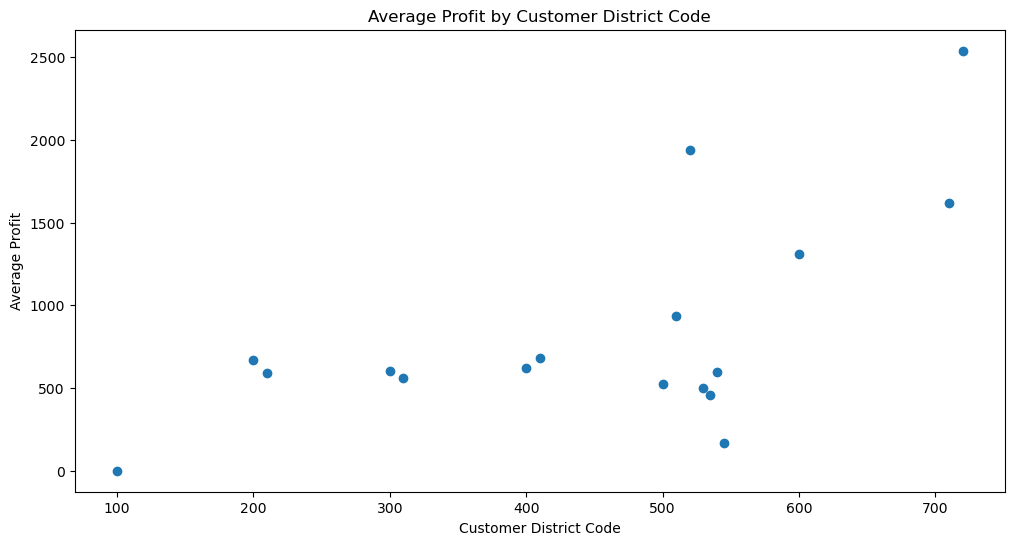

In [28]:
data_clean['profit'] = data_clean['value_sales'] - data_clean['value_cost']
district_profit = data_clean.groupby('customer_district_code')['profit'].mean()

plt.figure(figsize=(12, 6))
plt.scatter(x=district_profit.index, y=district_profit.values)
plt.title('Average Profit by Customer District Code')
plt.ylabel('Average Profit')
plt.xlabel('Customer District Code')
plt.show()

## section 2.4 (all the codes in one cell - do not insert extra cells) 

C:\Users\doomz\AppData\Local\Temp\ipykernel_23700\2513905467.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


IndexError: single positional indexer is out-of-bounds

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


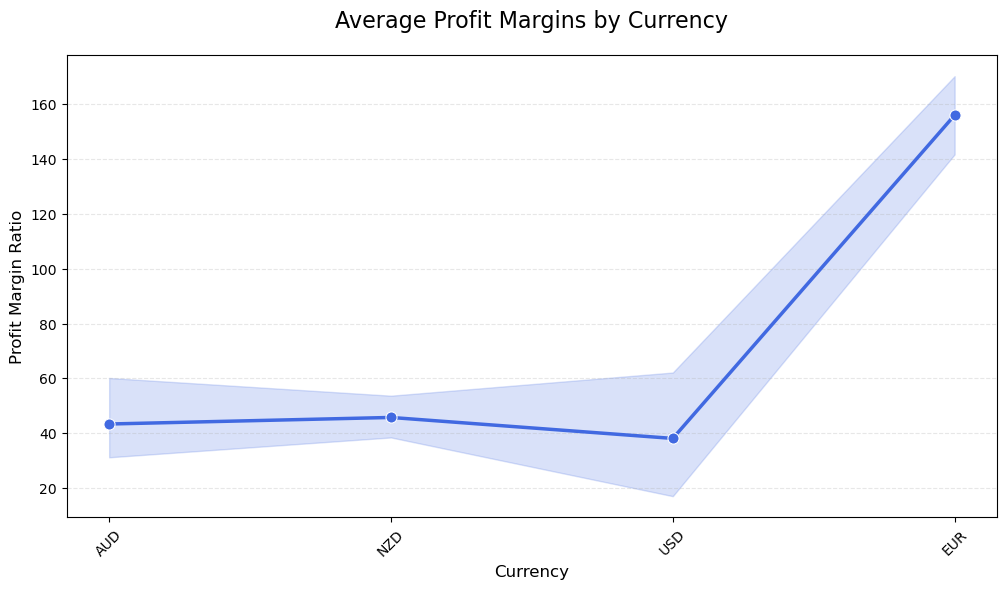

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate profit margin if not already done
data_clean['profit_margin'] = data_clean['profit'] / data_clean['value_cost']

plt.figure(figsize=(12, 6))

# Create line plot with confidence intervals
sns.lineplot(
    x='currency',
    y='profit_margin',
    data=data_clean,
    estimator='mean',  # Shows average profit margin
    ci=95,            # 95% confidence intervals
    marker='o',       # Markers for each data point
    markersize=8,
    color='royalblue',
    linewidth=2.5
)

# Enhancements for readability
plt.title('Average Profit Margins by Currency', fontsize=16, pad=20)
plt.ylabel('Profit Margin Ratio', fontsize=12)
plt.xlabel('Currency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Rotate x-labels if needed
plt.xticks(rotation=45 if len(data_clean['currency'].unique()) > 3 else 0)

# Add data labels
for line in range(len(data_clean['currency'].unique())):
    plt.text(
        x=line,
        y=data_clean.groupby('currency')['profit_margin'].mean().iloc[line] + 0.02,
        s=f"{data_clean.groupby('currency')['profit_margin'].mean().iloc[line]:.2f}",
        horizontalalignment='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

## section 2.5 (all the codes in one cell - do not insert extra cells) 

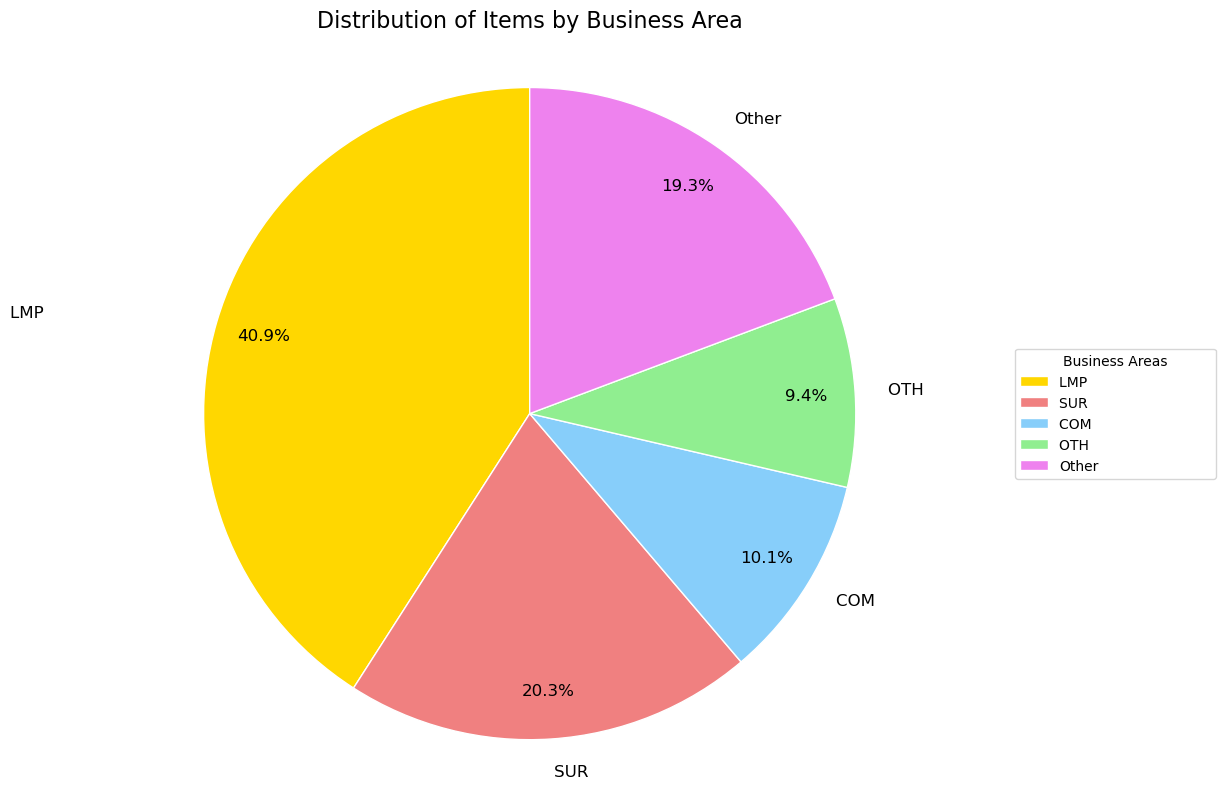


Composition of 'Other' category:
business_area_code
DLT                               101786
FLD                                89966
TRO                                33217
TAL                                33099
SAE                                28149
URB                                26771
RWY                                19222
HLB                                17666
PEN                                 8828
LCP                                 6591
980                                 5467
EXL                                 2229
970                                 1442
940                                 1168
999                                 1075
920                                  955
985                                  673
910                                  496
950                                  405
IAI                                  226
945                                  179
960                                  150
IAE                                   99
930 

In [31]:
# Calculate percentages and identify small categories
business_area_counts = data_clean['business_area_code'].value_counts()
total = business_area_counts.sum()
percentages = (business_area_counts / total) * 100

# Combine categories under 6% into 'Other'
threshold = 6
small_categories = percentages[percentages < threshold].index
business_area_counts_combined = business_area_counts.copy()
business_area_counts_combined['Other'] = business_area_counts[small_categories].sum()
business_area_counts_combined = business_area_counts_combined.drop(small_categories)

# Set up colors (now with fewer categories)
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'violet', 'orange', 'grey'][:len(business_area_counts_combined)]

# Create the improved pie chart
plt.figure(figsize=(12, 8))
business_area_counts_combined.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    pctdistance=0.85,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    labeldistance=1.1
)

plt.title('Distribution of Items by Business Area', fontsize=16, pad=20)
plt.ylabel('')

plt.legend(
    labels=business_area_counts_combined.index,
    title='Business Areas',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.axis('equal')
plt.tight_layout()
plt.show()

if len(small_categories) > 0:
    print("\nComposition of 'Other' category:")
    print(business_area_counts[small_categories])

# Answer to Section 3: Test Sub Sample Differences (all the codes in one cell - do not insert extra cells) 

## section 3.1 (all the codes in one cell - do not insert extra cells) 

In [33]:
from scipy.stats import ttest_ind

# Q1: ABC Class A vs C
group_a = data[data['abc_class_volume'] == 'A']['value_sales'].dropna()
group_c = data[data['abc_class_volume'] == 'C']['value_sales'].dropna()
t_stat1, p_val1 = ttest_ind(group_a, group_c, equal_var=False)

print("🔹 Q1: Sales Difference Between ABC Class A and C")
print("Business Question: Do products in ABC Class A have significantly different sales compared to those in Class C?\n")
print("Test Used: Independent two-sample t-test (unequal variance)")
print(f"T-statistic: {t_stat1:.3f}")
print(f"P-value: {p_val1:.4f}")
print("Significant at 0.05 level? ✅ Yes" if p_val1 < 0.05 else "Significant at 0.05 level? ❌ No")

if p_val1 < 0.05:
    print("\nInterpretation: There is a statistically significant difference in sales between Class A and C products.")


🔹 Q1: Sales Difference Between ABC Class A and C
Business Question: Do products in ABC Class A have significantly different sales compared to those in Class C?

Test Used: Independent two-sample t-test (unequal variance)
T-statistic: -2.263
P-value: 0.0237
Significant at 0.05 level? ✅ Yes

Interpretation: There is a statistically significant difference in sales between Class A and C products.


## section 3.2 (all the codes in one cell - do not insert extra cells) 

In [35]:
from scipy.stats import ttest_ind

# Q2: LED vs Traditional Light Source
group_led = data[data['light_source'] == 'LED']['value_sales'].dropna()
group_trad = data[data['light_source'] == 'Traditional']['value_sales'].dropna()

print(f"Group LED count: {len(group_led)}")
print(f"Group Traditional count: {len(group_trad)}\n")

if len(group_led) > 0 and len(group_trad) > 0:
    t_stat2, p_val2 = ttest_ind(group_led, group_trad, equal_var=False)

    print("🔹 Q2: Sales Difference Between LED and Traditional Light Sources")
    print("Business Question: Is there a significant difference in average sales between LED and Traditional lighting products?\n")
    print("Test Used: Independent two-sample t-test (unequal variance)")
    print(f"T-statistic: {t_stat2:.3f}")
    print(f"P-value: {p_val2:.4f}")
    print("Significant at 0.05 level? ✅ Yes" if p_val2 < 0.05 else "Significant at 0.05 level? ❌ No")

    if p_val2 < 0.05:
        print("\nInterpretation: LED and Traditional products show significantly different sales patterns.")

Group LED count: 150452
Group Traditional count: 1382233

🔹 Q2: Sales Difference Between LED and Traditional Light Sources
Business Question: Is there a significant difference in average sales between LED and Traditional lighting products?

Test Used: Independent two-sample t-test (unequal variance)
T-statistic: 38.863
P-value: 0.0000
Significant at 0.05 level? ✅ Yes

Interpretation: LED and Traditional products show significantly different sales patterns.


## section 3.3 (all the codes in one cell - do not insert extra cells) 

In [37]:
from scipy.stats import ttest_ind

# Q3: NextGen Electrical Solutions vs Ideal Electrical Solutions
group_chain1 = data[data['business_chain_l1_name'] == 'NextGen Electrical Solutions']['value_sales'].dropna()
group_chain2 = data[data['business_chain_l1_name'] == 'Ideal Electrical Solutions']['value_sales'].dropna()

print(f"Group NextGen count: {len(group_chain1)}")
print(f"Group Ideal count: {len(group_chain2)}\n")

if len(group_chain1) > 0 and len(group_chain2) > 0:
    t_stat3, p_val3 = ttest_ind(group_chain1, group_chain2, equal_var=False)

    print("🔹 Q3: Sales Difference Between NextGen and Ideal Electrical Solutions")
    print("Business Question: Do sales differ significantly between customers from NextGen vs. Ideal Electrical Solutions?\n")
    print("Test Used: Independent two-sample t-test (unequal variance)")
    print(f"T-statistic: {t_stat3:.3f}")
    print(f"P-value: {p_val3:.4f}")
    print("Significant at 0.05 level? ✅ Yes" if p_val3 < 0.05 else "Significant at 0.05 level? ❌ No")

    if p_val3 < 0.05:
        print("\nInterpretation: Sales patterns differ — tailor commercial terms, account support, or discount strategies.")

Group NextGen count: 161610
Group Ideal count: 5214

🔹 Q3: Sales Difference Between NextGen and Ideal Electrical Solutions
Business Question: Do sales differ significantly between customers from NextGen vs. Ideal Electrical Solutions?

Test Used: Independent two-sample t-test (unequal variance)
T-statistic: -5.989
P-value: 0.0000
Significant at 0.05 level? ✅ Yes

Interpretation: Sales patterns differ — tailor commercial terms, account support, or discount strategies.


# Answer to Section 4: Inference (all the codes in one cell - do not insert extra cells) 

## section 4.1 (all the codes in one cell - do not insert extra cells)

In [39]:
data_clean2 = data_clean[['order_type_code', 'value_sales']]
# which purchasing technique contributes the most to sales

In [41]:
#Q1 - wee  k 9/10
import seaborn as sns

# Which item class code impacts sales the most
# what product increase - categorical data must use dummy variables 0 & 1s + item class code p value > 0 = good

# 'order_type_code' 'value_sales'

# One-hot encoding the "item_class_code" column
section4part1_encoded_df = pd.get_dummies(data_clean2, columns=['order_type_code'], drop_first=True) #False will drop the last and nothing will give you a true/false output?

section4part1_encoded_df = section4part1_encoded_df.astype(int)

# Convert any boolean columns to integers (if necessary: incase you get False True values instead of zero/one)
#section4part1_encoded_df = section4part1_encoded_df.astype(int)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# variables that showed multicolin had the least influe + sign + insight generation were removed
X1 = section4part1_encoded_df.drop(['value_sales', 'order_type_code_EDI','order_type_code_NOR','order_type_code_CRD','order_type_code_CRR','order_type_code_PRO', 'order_type_code_PSA', 'order_type_code_WDC' ], axis=1) #need to delete more to remove multicollinearity
y1 = section4part1_encoded_df['value_sales']
X1 = sm.add_constant(X1)

# Fit the multiple regression model
model1 = sm.OLS(y1, X1).fit()

# Display the summary of the regression model
print(model1.summary())

#need VIF (multicolin) , histogram (normality), fitted vs residual (Constance variance - homo), pairplot (linearity)
#multiple regression


                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2335.
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:35:14   Log-Likelihood:            -2.0664e+07
No. Observations:             1970971   AIC:                         4.133e+07
Df Residuals:                 1970954   BIC:                         4.133e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1028.3313    

In [42]:
# Calculate VIF for each feature

vif_data_part1 = pd.DataFrame()
vif_data_part1['Feature'] = X1.columns
vif_data_part1['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

# Display the VIF data - 
print(vif_data_part1)

                Feature       VIF
0                 const  1.055832
1   order_type_code_CDG  1.000307
2   order_type_code_COA  1.000006
3   order_type_code_COP  1.000036
4   order_type_code_CPR  1.000017
5   order_type_code_CRP  1.000009
6   order_type_code_CSH  1.000057
7   order_type_code_EXP  1.000155
8   order_type_code_MIN  1.000021
9   order_type_code_NOH  1.000393
10  order_type_code_NOS  1.000070
11  order_type_code_PMO  1.000314
12  order_type_code_PRD  1.000474
13  order_type_code_PUP  1.000453
14  order_type_code_SPC  1.000143
15  order_type_code_ZCG  1.000054
16  order_type_code_ZCR  1.000040


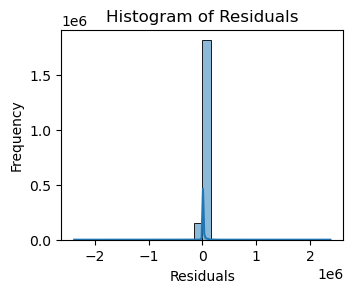

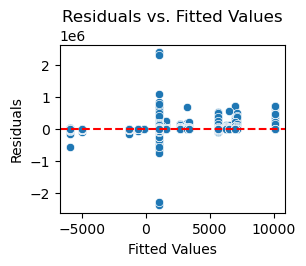

C:\Users\doomz\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


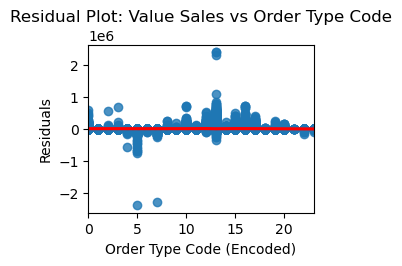

In [43]:
# Get the residuals
residuals1 = model1.resid


# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.histplot(residuals1, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Get fitted values
fitted_vals1 = model1.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.subplot(2,2,2)
sns.scatterplot(x=fitted_vals1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Create a pairplot of the data.
plt.subplot(2,2,3)
X11 = data_clean['order_type_code'].astype('category').cat.codes
y11 = data_clean['value_sales']

sns.residplot(x=X11, y=y11, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot: Value Sales vs Order Type Code")
plt.xlabel("Order Type Code (Encoded)")
plt.ylabel("Residuals")
plt.show()

## section 4.2 (all the codes in one cell - do not insert extra cells)

In [45]:
data_clean3 = data_clean[['abc_class_code', 'value_sales']]
# the importance of an item and its impact on sales - what type of product is good

In [46]:
# One-hot encoding the "abc_class_code" column
section4part2_encoded_df = pd.get_dummies(data_clean3, columns=['abc_class_code'], drop_first=True) 
section4part2_encoded_df = section4part2_encoded_df.astype(int)

#
X2 = section4part2_encoded_df.drop(['value_sales','abc_class_code_B'] , axis=1)
y2 = section4part2_encoded_df['value_sales']
X2 = sm.add_constant(X2)

# Fit the multiple regression model
model2 = sm.OLS(y2, X2).fit()

# Display the summary of the regression model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1999.
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:36:22   Log-Likelihood:            -2.0674e+07
No. Observations:             1970971   AIC:                         4.135e+07
Df Residuals:                 1970962   BIC:                         4.135e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              614.8661     12.264  

In [47]:
# Calculate VIF for each feature
vif_data_part2 = pd.DataFrame()
vif_data_part2['Feature'] = X2.columns
vif_data_part2['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Display the VIF data
print(vif_data_part2)

            Feature       VIF
0             const  3.921160
1  abc_class_code_C  1.187864
2  abc_class_code_D  1.271216
3  abc_class_code_E  1.038211
4  abc_class_code_F  1.009896
5  abc_class_code_G  1.245379
6  abc_class_code_I  1.061145
7  abc_class_code_J  1.537580
8  abc_class_code_U  1.249718


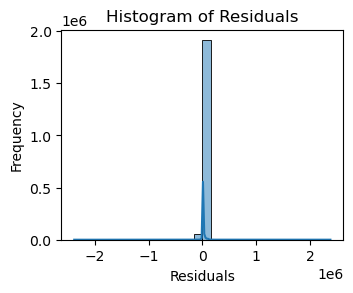

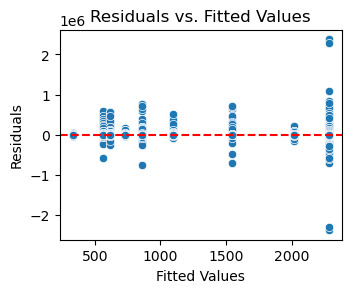

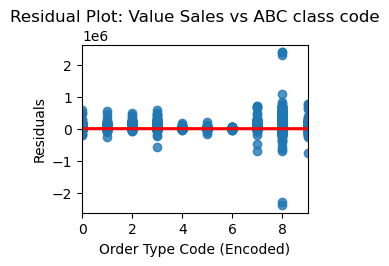

In [48]:
# Get the residuals
residuals2 = model2.resid

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.histplot(residuals2, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Get fitted values
fitted_vals2 = model2.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.subplot(2,2,2)
sns.scatterplot(x=fitted_vals2, y=residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Create a pairplot of the data.
plt.subplot(2,2,3)
X22 = data_clean['abc_class_code'].astype('category').cat.codes
y22 = data_clean['value_sales']

sns.residplot(x=X22, y=y22, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot: Value Sales vs ABC class code")
plt.xlabel("Order Type Code (Encoded)")
plt.ylabel("Residuals")
plt.show()

## section 4.3 (all the codes in one cell - do not insert extra cells)

In [49]:
data_clean4 = data_clean[['business_area_code', 'value_sales']]
# the importance of an item and its impact on sales - what type of product is good

In [50]:
data_clean4['business_area_code'].unique()

array(['COM                           ', 'OTH                           ',
       'LMP                           ', 'PEN                           ',
       'TRO                           ', 'DLT                           ',
       'SUR                           ', 'TAL                           ',
       '970', '999', '980', 'FLD                           ', '940',
       'URB                           ', 'IAE                           ',
       '985', 'LCP                           ',
       'IAI                           ', '920',
       'SAE                           ', 'EXL                           ',
       'HLB                           ', '950',
       'RWY                           ', '945', '910', '960', '930'],
      dtype=object)

In [51]:
# Which business area code impacts sales the most
# One-hot encoding the "item_class_code" column
section4part3_encoded_df = pd.get_dummies(data_clean4, columns=['business_area_code'], drop_first=True) #False will drop the last and nothing will give you a true/false output?

section4part3_encoded_df = section4part3_encoded_df.astype(int)

X3 = section4part3_encoded_df.drop(['value_sales','business_area_code_EXL                           ', 'business_area_code_930', 'business_area_code_950', 'business_area_code_960', 'business_area_code_COM                           ','business_area_code_DLT                           ', 'business_area_code_HLB                           ', 'business_area_code_LMP                           ', 'business_area_code_OTH                           ','business_area_code_RWY                           ', 'business_area_code_SAE                           ','business_area_code_SUR                           ','business_area_code_TAL                           ','business_area_code_TRO                           ','business_area_code_URB                           ' ] , axis=1) #need to delete more
y3 = section4part3_encoded_df['value_sales']

X3 = sm.add_constant(X3)

# Fit the multiple regression model
model3 = sm.OLS(y3, X3).fit()

# Display the summary of the regression model
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     281.5
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:37:00   Log-Likelihood:            -2.0681e+07
No. Observations:             1970971   AIC:                         4.136e+07
Df Residuals:                 1970958   BIC:                         4.136e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [52]:
# Calculate VIF for each feature
vif_data_part3 = pd.DataFrame()
vif_data_part3['Feature'] = X3.columns
vif_data_part3['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]

# Display the VIF data
print(vif_data_part3)

                                              Feature       VIF
0                                               const  1.062918
1                              business_area_code_920  1.000030
2                              business_area_code_940  1.000037
3                              business_area_code_945  1.000006
4                              business_area_code_970  1.000045
5                              business_area_code_980  1.000166
6                              business_area_code_985  1.000021
7                              business_area_code_999  1.000034
8   business_area_code_FLD                             1.000657
9   business_area_code_IAE                             1.000003
10  business_area_code_IAI                             1.000007
11  business_area_code_LCP                             1.000199
12  business_area_code_PEN                             1.000260


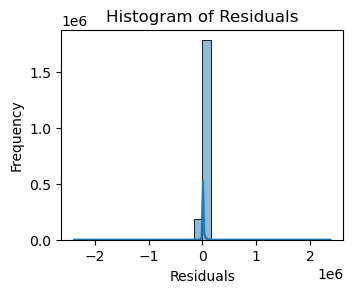

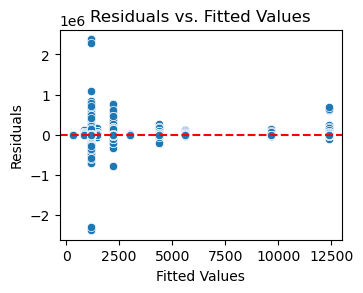

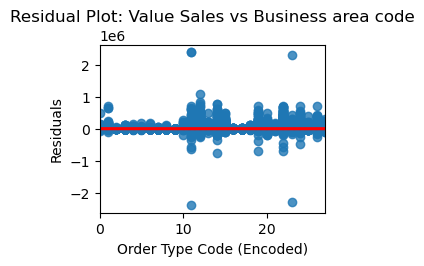

In [53]:
# Get the residuals
residuals3 = model3.resid

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.histplot(residuals3, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Get fitted values
fitted_vals3 = model3.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.subplot(2,2,2)
sns.scatterplot(x=fitted_vals3, y=residuals3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Create a pairplot of the data.
plt.subplot(2,2,3)
X33 = data_clean['business_area_code'].astype('category').cat.codes
y33 = data_clean['value_sales']

sns.residplot(x=X33, y=y33, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot: Value Sales vs Business area code")
plt.xlabel("Order Type Code (Encoded)")
plt.ylabel("Residuals")
plt.show()